In [119]:
def prime_list(n):
    """ Returns a list of primes < n """
    sieve = [True] * n
    for i in range(3,int(n**0.5)+1,2):
        if sieve[i]:
            sieve[i*i::2*i]=[False]*((n-i*i-1)//(2*i)+1)
    return [2] + [i for i in range(3,n,2) if sieve[i]]

In [120]:
from functools import lru_cache

@lru_cache(maxsize=2 ** 17)
def is_prime(num):
    return not (num < 2 or any(num % i == 0 for i in range(2, int(num ** 0.5) + 1)))

In [121]:
def gen_primes():
    """ Generate an infinite sequence of prime numbers """
    D, q = {}, 2
    while True:
        if q not in D:
            yield q
            D[q * q] = [q]
        else:
            for p in D[q]:
                D.setdefault(p + q, []).append(p)
            del D[q]
        q += 1

In [122]:
def factorize(num, primes=gen_primes()):
    """ Returns a list of prime factors of num """
    if not float(num).is_integer() or num < 1:
        raise Exception("Error: Can only factorize positive integers.")
    prime_factors = []
    for prime in primes:
        while not num % prime:
            prime_factors.append(prime)
            num = num // prime
        if num == 1:
            return prime_factors

In [123]:
from functools import lru_cache

@lru_cache(maxsize=2 ** 16)
def gcd(a, b):
    """ Euclid's method for GCD """
    while b:
        a, b=b, a%b
    return a

In [124]:
def totient(num):
    """ Returns Euler's totient funtion of num """
    y = num
    for x in range(2, num + 1):
        if is_prime(x) and not num % x:
            y *= 1 - 1 / x
    return int(y)

In [125]:
def phi(a):
    b=a-1
    c=0
    while b:
        if not gcd(a,b)-1:
            c+=1
        b-=1
    return c if c else 1

In [126]:
def totient_list(num):
    """ Return sequence of totient function """
    totient_values = [1]
    for x in range(2, num + 1):
        totient_values.append(phi(x))       
    return totient_values

In [186]:
from math import log2

N, x, y, p = 1000000 , [], [], []
n, max_value = 2, 0
while n <= N:
    print(n)
    tot = phi(n)
    value = n/tot
    if value > max_value:
        max_value = value
        n_max = n
        x.append(n)
        y.append(value)
        p.append(tot)
    n += n_max

2
4
6
12
18
24
30
60
90
120
150
180
210
420


630
840
1050
1260
1470
1680
1890
2100
2310
4620
6930
9240
11550
13860
16170
18480
20790
23100
25410
27720
30030
60060
90090


120120


150150


180180


210210


240240


270270


300300


330330


360360


390390


420420


450450


480480


510510


In [177]:
from math import log2
from math import log10

y2 = [log2(log2(i)) + 1.313 for i in x]

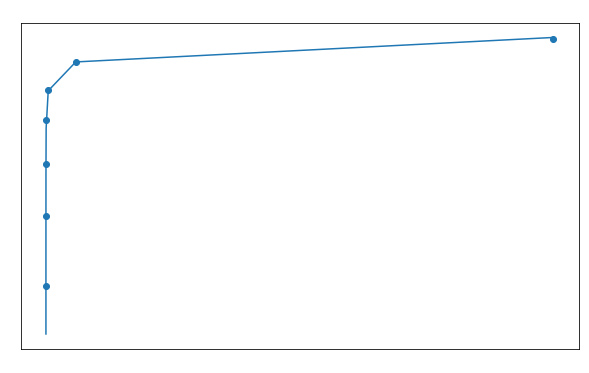

In [178]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.title('title').set_color('w')
plt.plot(x, y2)
plt.tick_params('both', colors='w')
plt.show()

In [192]:
prime_product = 1
n_local_minima = []
for x in gen_primes():
    prime_product *= x
    n_local_minima.append(prime_product)
    if len(n_local_minima) == 15:
        break

In [198]:
totient_local_minima = [1, 2, 8, 48, 480, 5760, 92160, 1658880, 36495360, 1021870080, 30656102400, 1103619686400, 44144787456000, 1854081073152000, 85287729364992000]
n_local_minima = [2, 6, 30, 210, 2310, 30030, 510510, 9699690, 223092870, 6469693230, 200560490130, 7420738134810, 304250263527210, 13082761331670030, 614889782588491410]

In [211]:
phi(87109)

79180

In [212]:
87109/79180

1.1001389239706996

In [221]:
minimal = []
for x in range(2, 2000):
    if x / phi(x) < 1.101:
        minimal.append(x)

In [223]:
len(minimal)

403

In [224]:
other = prime_list(2000)

In [226]:
len(other)

303

In [1]:
2*2*2*2*5*19*3*3*17*7*13*11

232792560